In [1]:
#Imports
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import os

In [2]:
# MNIST Dataset
mnist = input_data.read_data_sets('MNIST_data',one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
#Hyper parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100
display_step = 1

In [4]:
# Network Parameters
n_hidden_1 = 256 # 1st layer number of features
n_hidden_2 = 256 # 2nd layer number of features
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)«

In [59]:

x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])

<tf.Tensor 'Placeholder_4:0' shape=(?, 784) dtype=float32>

In [6]:
# 3 layered network

def build_three_layered_network():
    weights = {
        'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
        'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
        'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
    }
    biases = {
        'b1': tf.Variable(tf.random_normal([n_hidden_1])),
        'b2': tf.Variable(tf.random_normal([n_hidden_2])),
        'out': tf.Variable(tf.random_normal([n_classes]))
    }
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
        # Hidden layer with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
        # Output layer with linear activation
    pred = tf.matmul(layer_2, weights['out']) + biases['out']
    return pred


In [41]:
pred = build_three_layered_network()
pred.shape

TensorShape([Dimension(None), Dimension(10)])

In [8]:
# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [9]:
init = tf.global_variables_initializer()

In [10]:
session = tf.Session()
session.run(init)

In [11]:
#initializing Saver 
saver = tf.train.Saver()
save_dir = 'checkpoints/'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
save_path = os.path.join(save_dir, 'best_validation')

In [12]:
def optimize(training_epochs):
    for epoch in range(training_epochs):
        total_batch = int(mnist.train.num_examples/batch_size)
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            session.run([optimizer, cost], feed_dict={x: batch_x,
                                                          y: batch_y})
    saver.save(session, save_path)
    print("Model saved in file: %s" % save_path)

In [13]:
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

In [14]:
def print_accuracy():
    acc = session.run(accuracy,feed_dict={x: mnist.test.images,y: mnist.test.labels})
    print("Accuracy on test-set: {0:.1%}".format(acc))

In [15]:
#Without any Optimization So accuracy will be very Low
print_accuracy()

Accuracy on test-set: 8.2%


In [16]:
# Optimize with 1 epoch
optimize(1)
print_accuracy()

Model saved in file: checkpoints/best_validation
Accuracy on test-set: 86.2%


In [17]:
#Closing The Session
session.close()

In [18]:
#initializing new Session and Load pretrained model
session = tf.Session()
saver = tf.train.import_meta_graph('checkpoints/best_validation.meta')
saver.restore(session,tf.train.latest_checkpoint('checkpoints/'))

In [19]:
#Print Accuricy which will be with
print_accuracy()

Accuracy on test-set: 86.2%


In [20]:
#Optimize restored graph for 3 more epochs
optimize(3)
print_accuracy()

Model saved in file: checkpoints/best_validation
Accuracy on test-set: 92.1%


In [21]:
#Closing Session
session.close()

In [22]:
#Loading last saved model
session = tf.Session()
saver = tf.train.import_meta_graph('checkpoints/best_validation.meta')
saver.restore(session,tf.train.latest_checkpoint('checkpoints/'))
print_accuracy()

Accuracy on test-set: 92.1%


In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

In [38]:
images=mnist.validation.images[1]
images.shape

(784,)

In [39]:
def plot_images(image):
    plt.imshow(image.reshape((28,28)))

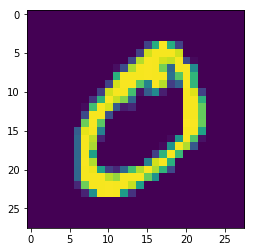

In [40]:
plot_images(images)

In [63]:
x_images= np.reshape(images, [-1, 784])
acc = session.run(pred, feed_dict={x:mnist.test.images})


InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder' with dtype float
	 [[Node: Placeholder = Placeholder[dtype=DT_FLOAT, shape=[], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'Placeholder', defined at:
  File "//anaconda/envs/tensorflow/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "//anaconda/envs/tensorflow/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "//anaconda/envs/tensorflow/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "//anaconda/envs/tensorflow/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "//anaconda/envs/tensorflow/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "//anaconda/envs/tensorflow/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "//anaconda/envs/tensorflow/lib/python3.5/site-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "//anaconda/envs/tensorflow/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "//anaconda/envs/tensorflow/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "//anaconda/envs/tensorflow/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "//anaconda/envs/tensorflow/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "//anaconda/envs/tensorflow/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "//anaconda/envs/tensorflow/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "//anaconda/envs/tensorflow/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "//anaconda/envs/tensorflow/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "//anaconda/envs/tensorflow/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "//anaconda/envs/tensorflow/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "//anaconda/envs/tensorflow/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "//anaconda/envs/tensorflow/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "//anaconda/envs/tensorflow/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-5-5bbdb5c6f9f5>", line 1, in <module>
    x = tf.placeholder("float", [None, n_input])
  File "//anaconda/envs/tensorflow/lib/python3.5/site-packages/tensorflow/python/ops/array_ops.py", line 1520, in placeholder
    name=name)
  File "//anaconda/envs/tensorflow/lib/python3.5/site-packages/tensorflow/python/ops/gen_array_ops.py", line 2149, in _placeholder
    name=name)
  File "//anaconda/envs/tensorflow/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 763, in apply_op
    op_def=op_def)
  File "//anaconda/envs/tensorflow/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2395, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "//anaconda/envs/tensorflow/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1264, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Placeholder' with dtype float
	 [[Node: Placeholder = Placeholder[dtype=DT_FLOAT, shape=[], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


In [61]:
mnist.test.images.shape

(10000, 784)